In [1]:
import numpy as np
from itertools import combinations
import scipy

from qokit.utils import brute_force
from qokit import get_qaoa_objective

## Step 1: Generate terms
For example, for Sherrington-Kirkpatrick model on 4 sites, we can get the terms as follows

In [2]:
N = 4
np.random.seed(10)
terms = [(np.random.normal(), spin_pair) for spin_pair in combinations(range(N), r=2)]

## Step 2: get QAOA objective

We must choose QAOA depth $p$

In [3]:
# Get objective
p = 5
f = get_qaoa_objective(N, p, terms=terms, parameterization='theta')

## Step 3: Optimize QAOA parameters

In [4]:
initial_gamma = -1*np.linspace(0, 1, p)
initial_beta = np.linspace(1, 0, p)

res = scipy.optimize.minimize(f, np.hstack([initial_gamma, initial_beta]), method='COBYLA', options={'rhobeg': 0.01})

In [5]:
print(f"Expected QAOA solution quality: {res.fun:.5f}")

Expected QAOA solution quality: -3.49562


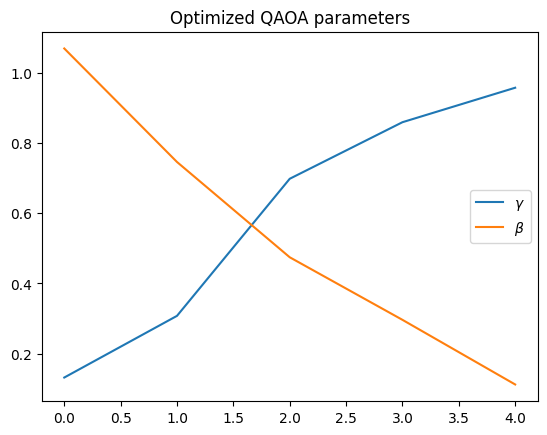

In [6]:
import matplotlib.pyplot as plt
plt.plot(-res.x[:p], label=r"$\gamma$")
plt.plot(res.x[p:], label=r"$\beta$")
plt.title('Optimized QAOA parameters')
plt.legend()

## Compare to optimal solution

In [7]:
def f_from_terms_ground_truth(s):
    """ground truth for debugging
    """
    out = 0
    for coeff, (i, j) in terms:
        out += coeff * s[i] * s[j]
    return out

In [8]:
print(f"True minimum: {brute_force(f_from_terms_ground_truth, N, minimize=True)[0]:.5f}")

True minimum: -3.50190


QAOA gets very close to true minimum!